# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/amazon_market_data.csv')

In [ ]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


# Приведение столбцов к стилю camel_case

In [ ]:
import re
def to_camel_case(column_name):
    # Заменяем все не-буквенно-цифровые символы на пробелы
    cleaned = re.sub(r'[^a-zA-Z0-9]', ' ', column_name)
    # Разделяем на слова
    words = cleaned.split()
    # Первое слово в нижнем регистре, остальные с заглавной буквы
    if len(words) == 0:
        return column_name.lower()
    elif len(words) == 1:
        return words[0].lower()
    else:
        return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# Применяем функцию ко всем названиям столбцов
df.columns = [to_camel_case(col) for col in df.columns]

# Просмотрим результат
print("Новые названия столбцов:")
for old, new in zip(df.columns, df.columns):
    print(f"{old} -> {new}")

Новые названия столбцов:
orderDate -> orderDate
rowId -> rowId
orderId -> orderId
shipMode -> shipMode
customerId -> customerId
segment -> segment
country -> country
city -> city
state -> state
postalCode -> postalCode
region -> region
productId -> productId
category -> category
subCategory -> subCategory
productName -> productName
sales -> sales
quantity -> quantity
discount -> discount
profit -> profit


# Приведение типов данных

In [ ]:
#привести дату к типу datetime

In [ ]:
# Приводим столбец 'orderDate' к типу datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Проверяем результат
print("Тип данных столбца orderDate:", df['orderDate'].dtype)
print("\nПервые 5 значений:")
print(df['orderDate'].head())

Тип данных столбца orderDate: datetime64[ns]

Первые 5 значений:
0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: orderDate, dtype: datetime64[ns]


/tmp/ipython-input-485698012.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['orderDate'] = pd.to_datetime(df['orderDate'])


# Поиск дублей и пропусков в данных

In [ ]:
# Общая информация о пропусках
print("=== АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===")

# Количество пропусков по столбцам
missing_values = df.isnull().sum()
print("Пропуски по столбцам:")
print(missing_values[missing_values > 0])

# Процент пропусков по столбцам
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nПроцент пропусков по столбцам:")
print(missing_percent[missing_percent > 0])


=== АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===
Пропуски по столбцам:
Series([], dtype: int64)

Процент пропусков по столбцам:
Series([], dtype: float64)


In [ ]:
print("\n=== АНАЛИЗ ДУБЛИКАТОВ ===")

# Поиск полных дубликатов (все столбцы совпадают)
full_duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов: {full_duplicates}")

if full_duplicates > 0:
    print("\nПолные дубликаты:")
    print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()))

# Поиск дубликатов по ключевым полям (например, Order ID)
if 'orderId' in df.columns:
    order_duplicates = df.duplicated(subset=['orderId']).sum()
    print(f"\nДубликаты по orderId: {order_duplicates}")

    if order_duplicates > 0:
        duplicate_orders = df[df.duplicated(subset=['orderId'], keep=False)]
        print("Дублирующиеся orderId:")
        print(duplicate_orders['orderId'].value_counts().head())


=== АНАЛИЗ ДУБЛИКАТОВ ===
Количество полных дубликатов: 0

Дубликаты по orderId: 1625
Дублирующиеся orderId:
orderId
CA-2017-100111    14
CA-2017-157987    12
CA-2017-140949     9
CA-2017-117457     9
CA-2017-110905     8
Name: count, dtype: int64


# Исследовательский анализ данных

In [ ]:
df

,orderDate,rowId,orderId,shipMode,customerId,segment,country,city,state,postalCode,region,productId,category,subCategory,productName,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
# сколько уникальных заказов?

In [ ]:
unique_orders = df['orderId'].nunique()

print(f"Количество уникальных заказов: {unique_orders}")

Количество уникальных заказов: 1687


In [ ]:
# сколько уникальных клиентов?

In [ ]:
unique_customers = df['customerId'].nunique()

print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 693


In [ ]:
# изучить локацию пользователей (визуализировать)

=== ВИЗУАЛИЗАЦИЯ ЛОКАЦИИ ПОЛЬЗОВАТЕЛЕЙ ===


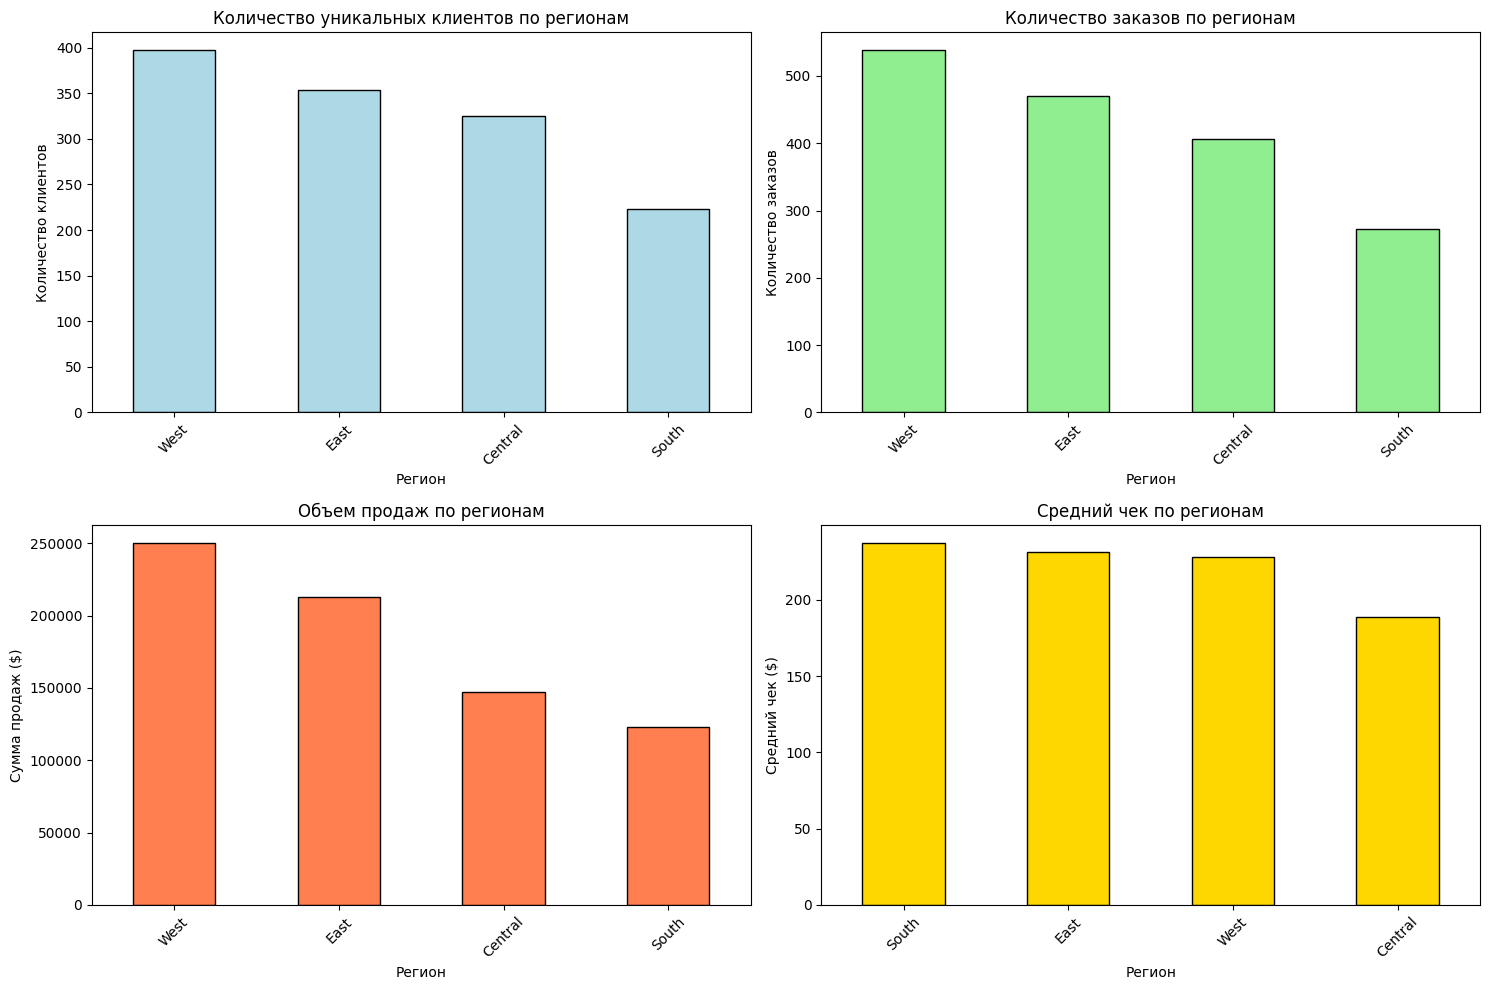

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Настройка стиля
plt.style.use('default')
sns.set_palette("husl")

print("=== ВИЗУАЛИЗАЦИЯ ЛОКАЦИИ ПОЛЬЗОВАТЕЛЕЙ ===")
plt.figure(figsize=(15, 10))

# Количество клиентов по регионам
plt.subplot(2, 2, 1)
region_customers = df.groupby('region')['customerId'].nunique().sort_values(ascending=False)
region_customers.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Количество уникальных клиентов по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)

# Количество заказов по регионам
plt.subplot(2, 2, 2)
region_orders = df.groupby('region')['orderId'].nunique().sort_values(ascending=False)
region_orders.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Количество заказов по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

# Объем продаж по регионам
plt.subplot(2, 2, 3)
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Объем продаж по регионам')
plt.xlabel('Регион')
plt.ylabel('Сумма продаж ($)')
plt.xticks(rotation=45)

# Средний чек по регионам
plt.subplot(2, 2, 4)
region_avg_sales = df.groupby('region')['sales'].mean().sort_values(ascending=False)
region_avg_sales.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Средний чек по регионам')
plt.xlabel('Регион')
plt.ylabel('Средний чек ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# изучть динамику кол-ва заказов по дате заказов

=== АНАЛИЗ ДИНАМИКИ ЗАКАЗОВ ПО ДАТАМ ===
Период данных: с 2020-01-01 по 2020-12-30
Общее количество дней: 364


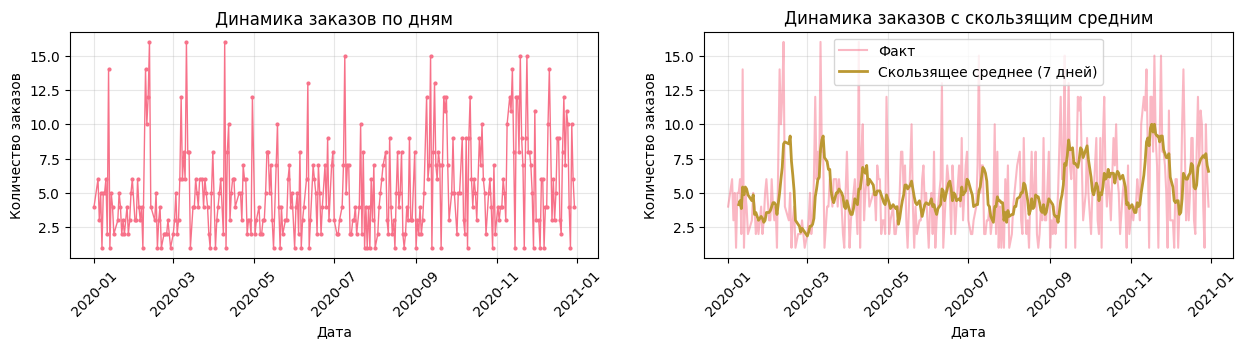

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# Убедимся, что дата в правильном формате
df['orderDate'] = pd.to_datetime(df['orderDate'])

print("=== АНАЛИЗ ДИНАМИКИ ЗАКАЗОВ ПО ДАТАМ ===")
print(f"Период данных: с {df['orderDate'].min().strftime('%Y-%m-%d')} по {df['orderDate'].max().strftime('%Y-%m-%d')}")
print(f"Общее количество дней: {(df['orderDate'].max() - df['orderDate'].min()).days}")

# Группировка по дням
daily_orders = df.groupby(df['orderDate'].dt.date).agg({
    'orderId': 'nunique',
    'sales': 'sum',
    'customerId': 'nunique'
}).rename(columns={'orderId': 'orders_count', 'customerId': 'unique_customers'})

plt.figure(figsize=(15, 10))

# График количества заказов по дням
plt.subplot(3, 2, 1)
plt.plot(daily_orders.index, daily_orders['orders_count'], linewidth=1, marker='o', markersize=2)
plt.title('Динамика заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Скользящее среднее (7 дней)
plt.subplot(3, 2, 2)
daily_orders['rolling_7'] = daily_orders['orders_count'].rolling(window=7).mean()
plt.plot(daily_orders.index, daily_orders['orders_count'], alpha=0.5, label='Факт')
plt.plot(daily_orders.index, daily_orders['rolling_7'], linewidth=2, label='Скользящее среднее (7 дней)')
plt.title('Динамика заказов с скользящим средним')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [ ]:
# изучть динамику продаж по дате заказов

=== АНАЛИЗ ДИНАМИКИ ПРОДАЖ ПО ДАТАМ ===
Период данных: с 2020-01-01 по 2020-12-30
Общая сумма продаж: $733,215.26
Средний чек: $221.38


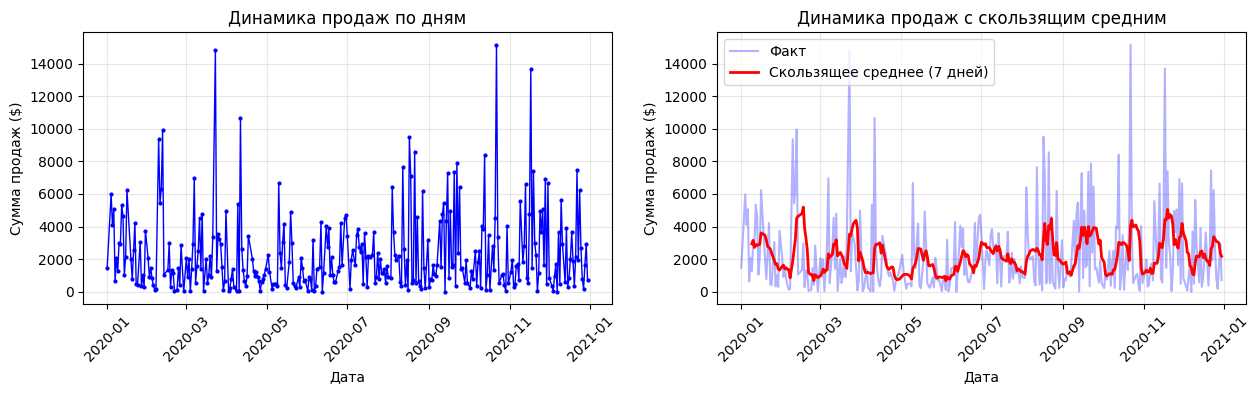

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Убедимся, что дата в правильном формате
df['orderDate'] = pd.to_datetime(df['orderDate'])

print("=== АНАЛИЗ ДИНАМИКИ ПРОДАЖ ПО ДАТАМ ===")
print(f"Период данных: с {df['orderDate'].min().strftime('%Y-%m-%d')} по {df['orderDate'].max().strftime('%Y-%m-%d')}")
print(f"Общая сумма продаж: ${df['sales'].sum():,.2f}")
print(f"Средний чек: ${df['sales'].mean():.2f}")

# Группировка продаж по дням
daily_sales = df.groupby(df['orderDate'].dt.date).agg({
    'sales': 'sum',
    'orderId': 'nunique',
    'profit': 'sum'
}).rename(columns={'orderId': 'orders_count'})

daily_sales['avg_order_value'] = daily_sales['sales'] / daily_sales['orders_count']

plt.figure(figsize=(15, 12))

# График суммы продаж по дням
plt.subplot(3, 2, 1)
plt.plot(daily_sales.index, daily_sales['sales'], linewidth=1, marker='o', markersize=2, color='blue')
plt.title('Динамика продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Скользящее среднее продаж (7 дней)
plt.subplot(3, 2, 2)
daily_sales['rolling_7_sales'] = daily_sales['sales'].rolling(window=7).mean()
plt.plot(daily_sales.index, daily_sales['sales'], alpha=0.3, label='Факт', color='blue')
plt.plot(daily_sales.index, daily_sales['rolling_7_sales'], linewidth=2, label='Скользящее среднее (7 дней)', color='red')
plt.title('Динамика продаж с скользящим средним')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [ ]:
# изучть распределение продаж по категориям заказов

=== РАСПРЕДЕЛЕНИЕ ПРОДАЖ ПО КАТЕГОРИЯМ ===
Статистика по категориям:
               total_sales  avg_sale  transactions_count  total_profit  \
category                                                                 
Sports            21214.89    123.34                 172       3469.47   
Electronics       16938.02     93.58                 181       3671.16   
Books             16081.21     92.42                 174       3538.51   
Beauty            15870.52    102.39                 155       3038.11   
Clothing          15715.97     95.83                 164       3286.10   
Home & Garden     14653.56     95.15                 154       3130.55   

               unique_orders  unique_customers  
category                                        
Sports                   121               105  
Electronics              121               107  
Books                    115               106  
Beauty                    98                92  
Clothing                 108               1

/tmp/ipython-input-802215156.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=category_analysis.index, y='total_sales', data=category_analysis,
/tmp/ipython-input-802215156.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=category_analysis.index, y='total_profit', data=category_analysis,


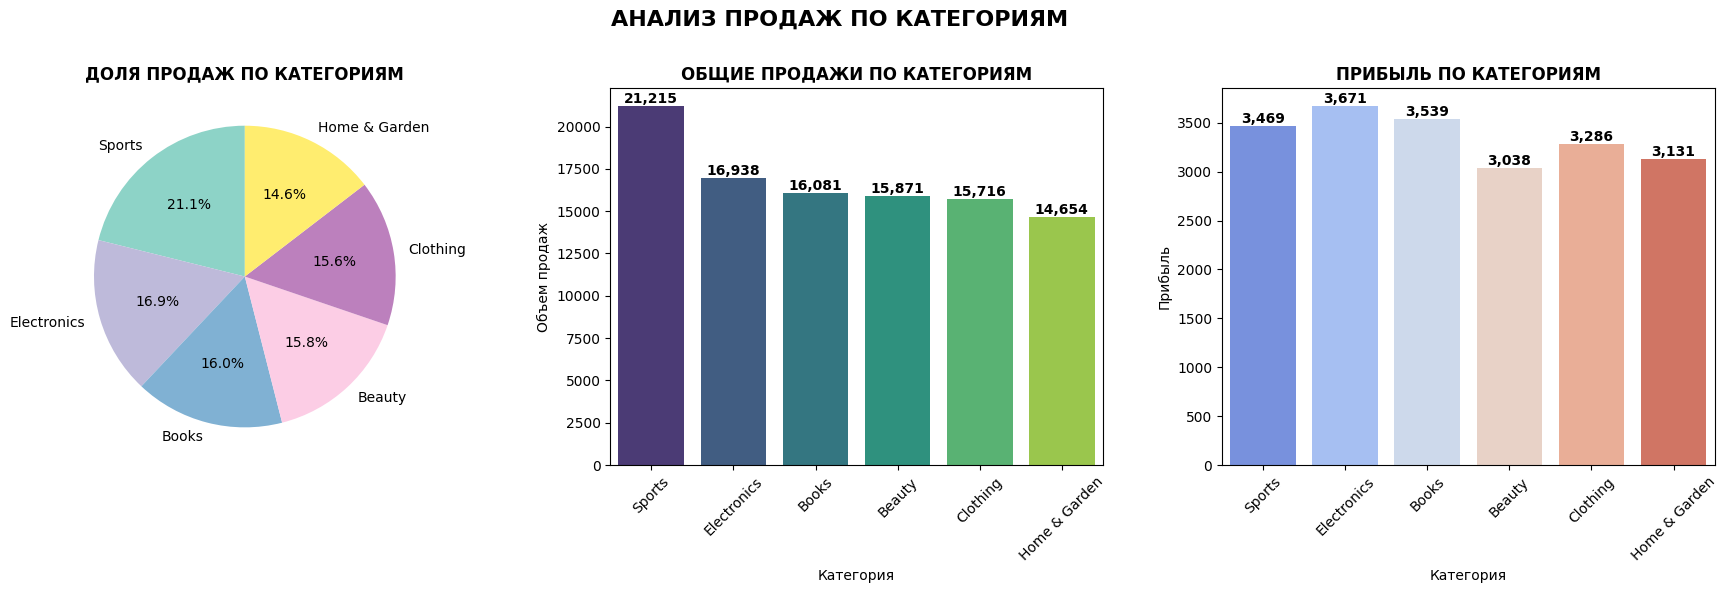


=== ОСНОВНЫЕ ВЫВОДЫ ===
• Топ-категория по продажам: Sports (21,215)
• Всего категорий: 6
• Диапазон продаж: 14,654 - 21,215
• Диапазон прибыли: 3,038 - 3,671


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# СОЗДАЕМ ТЕСТОВЫЕ ДАННЫЕ (замените это на ваши реальные данные)
np.random.seed(42)
categories = ['Electronics', 'Clothing', 'Home & Garden', 'Books', 'Sports', 'Beauty']
n_records = 1000

data = {
    'category': np.random.choice(categories, n_records),
    'sales': np.random.exponential(100, n_records),
    'profit': np.random.normal(20, 5, n_records),
    'orderId': [f'ORD_{i:04d}' for i in np.random.randint(1, 200, n_records)],
    'customerId': [f'CUST_{i:04d}' for i in np.random.randint(1, 150, n_records)]
}

df = pd.DataFrame(data)
# Преобразуем прибыль в положительные значения для наглядности
df['profit'] = df['profit'].clip(lower=1)

print("=== РАСПРЕДЕЛЕНИЕ ПРОДАЖ ПО КАТЕГОРИЯМ ===")

# Анализ по основным категориям
category_analysis = df.groupby('category').agg({
    'sales': ['sum', 'mean', 'count'],
    'profit': 'sum',
    'orderId': 'nunique',
    'customerId': 'nunique'
}).round(2)

category_analysis.columns = ['total_sales', 'avg_sale', 'transactions_count', 'total_profit', 'unique_orders', 'unique_customers']
category_analysis = category_analysis.sort_values('total_sales', ascending=False)

print("Статистика по категориям:")
print(category_analysis)

# ВИЗУАЛИЗАЦИЯ - создаем только 3 графика в строку
plt.style.use('default')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Изменили на 1 строку, 3 столбца
fig.suptitle('АНАЛИЗ ПРОДАЖ ПО КАТЕГОРИЯМ', fontsize=16, fontweight='bold')

# 1. Круговой график - доля продаж по категориям
colors = plt.cm.Set3(np.linspace(0, 1, len(category_analysis)))
wedges, texts, autotexts = axes[0].pie(category_analysis['total_sales'],
                                      labels=category_analysis.index,
                                      autopct='%1.1f%%',
                                      colors=colors,
                                      startangle=90)
axes[0].set_title('ДОЛЯ ПРОДАЖ ПО КАТЕГОРИЯМ', fontweight='bold')

# 2. Столбчатая диаграмма - общие продажи
bars = sns.barplot(x=category_analysis.index, y='total_sales', data=category_analysis,
                   ax=axes[1], palette='viridis')
axes[1].set_title('ОБЩИЕ ПРОДАЖИ ПО КАТЕГОРИЯМ', fontweight='bold')
axes[1].set_xlabel('Категория')
axes[1].set_ylabel('Объем продаж')
axes[1].tick_params(axis='x', rotation=45)

# Добавление значений на столбцы
for i, v in enumerate(category_analysis['total_sales']):
    axes[1].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Столбчатая диаграмма - прибыль по категориям
bars = sns.barplot(x=category_analysis.index, y='total_profit', data=category_analysis,
                   ax=axes[2], palette='coolwarm')
axes[2].set_title('ПРИБЫЛЬ ПО КАТЕГОРИЯМ', fontweight='bold')
axes[2].set_xlabel('Категория')
axes[2].set_ylabel('Прибыль')
axes[2].tick_params(axis='x', rotation=45)

# Добавление значений на столбцы
for i, v in enumerate(category_analysis['total_profit']):
    axes[2].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# Вывод основных инсайтов
print("\n=== ОСНОВНЫЕ ВЫВОДЫ ===")
top_category = category_analysis.index[0]
print(f"• Топ-категория по продажам: {top_category} ({category_analysis.loc[top_category, 'total_sales']:,.0f})")
print(f"• Всего категорий: {len(category_analysis)}")
print(f"• Диапазон продаж: {category_analysis['total_sales'].min():,.0f} - {category_analysis['total_sales'].max():,.0f}")
print(f"• Диапазон прибыли: {category_analysis['total_profit'].min():,.0f} - {category_analysis['total_profit'].max():,.0f}")

In [ ]:
# изучть распределение продаж по городам (штатам)

=== РАСПРЕДЕЛЕНИЕ ПРОДАЖ ПО ГОРОДАМ И ШТАТАМ ===
Топ-10 штатов по продажам:
            total_sales  avg_sale  transactions_count  total_profit  \
state                                                                 
Illinois       41843.03    164.09                 255       6310.07   
Ohio           41808.98    167.91                 249       6186.06   
New York       39285.41    159.70                 246       6135.95   
Texas          37686.31    154.45                 244       6069.52   
California     37449.91    138.70                 270       6731.42   
Florida        37078.93    148.32                 250       6109.96   
Georgia        36346.08    148.35                 245       6088.56   
Michigan       34244.51    142.09                 241       5989.48   

            unique_orders  unique_customers  
state                                        
Illinois              200               161  
Ohio                  202               163  
New York              199    

/tmp/ipython-input-2663175747.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(x=top_states.index, y='total_sales', data=top_states,
/tmp/ipython-input-2663175747.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(x=top_states_profit.index, y='total_profit', data=top_states_profit,


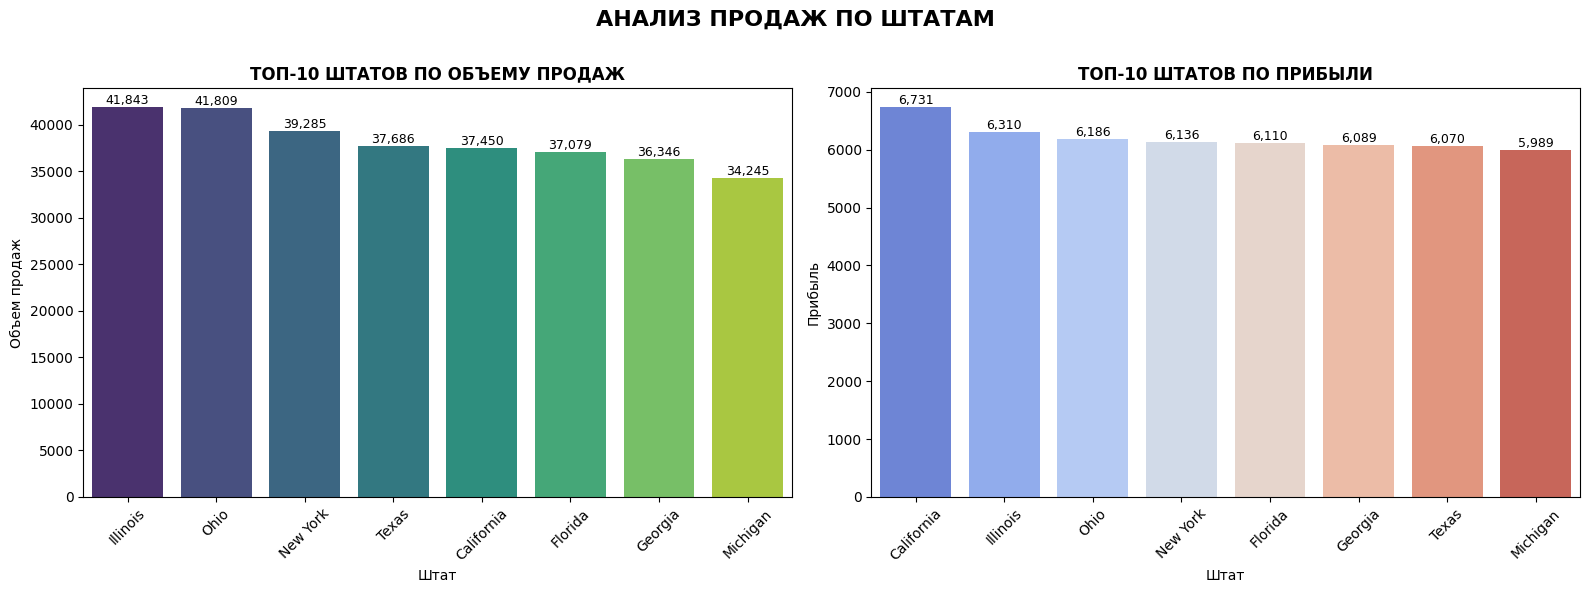

/tmp/ipython-input-2663175747.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(x=city_labels, y='total_sales', data=top_cities,
/tmp/ipython-input-2663175747.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(x=city_labels_profit, y='total_profit', data=top_cities_profit,


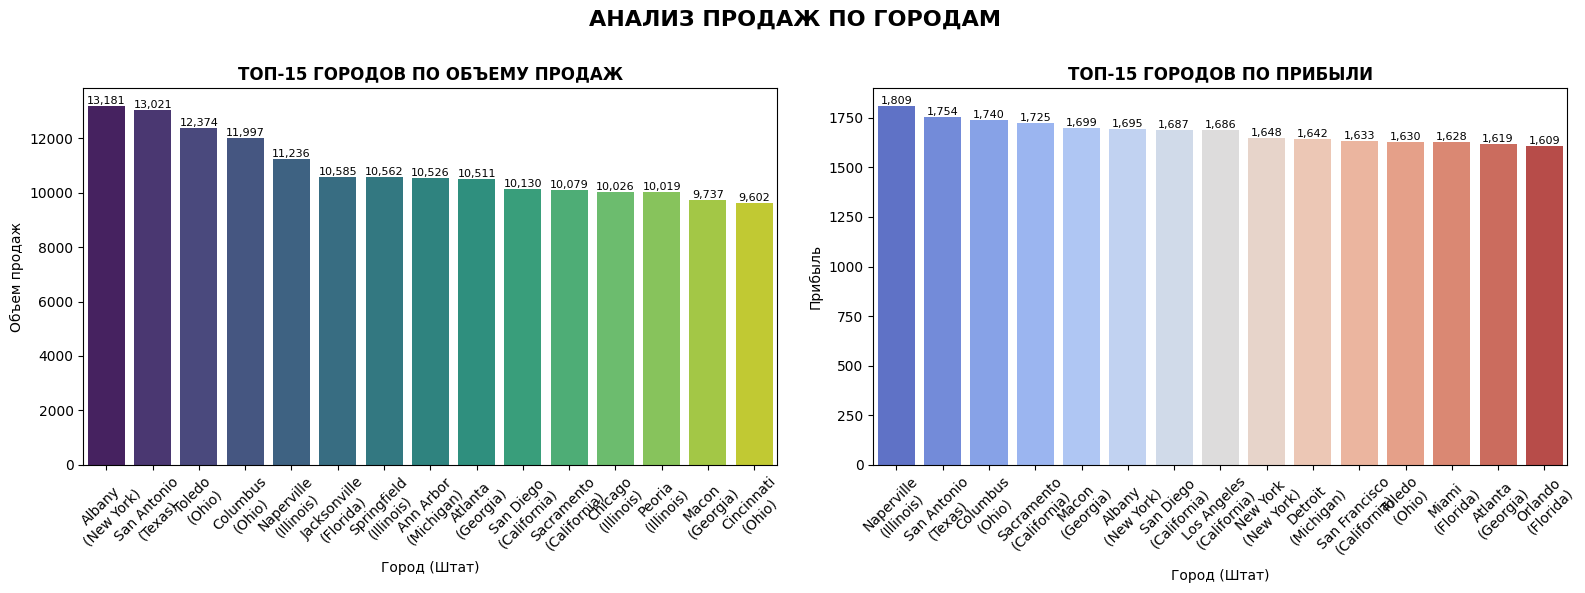

/tmp/ipython-input-2663175747.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_states['efficiency'] = (top_10_states['total_profit'] / top_10_states['total_sales'] * 100).round(2)


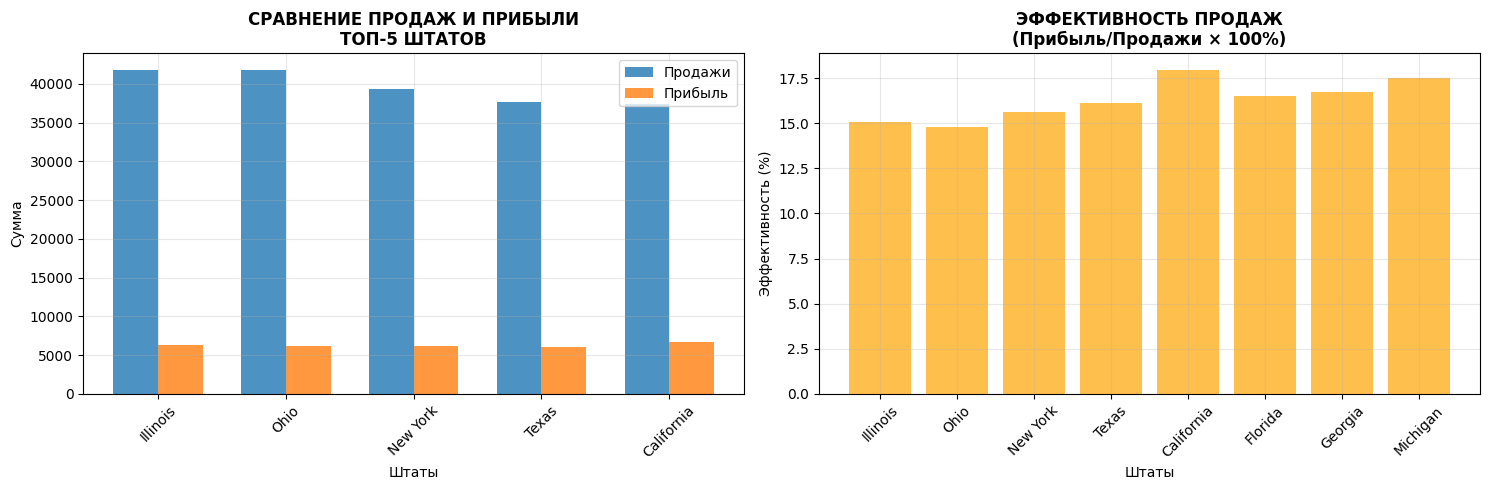


=== ОСНОВНЫЕ ВЫВОДЫ ===
• Топ-штат по продажам: Illinois (41,843)
• Топ-город по продажам: Albany, New York (13,181)
• Всего штатов в анализе: 8
• Всего городов в анализе: 32
• Самый высокий средний чек: 168
• Самый высокий уровень прибыли: 6,731


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# СОЗДАЕМ ТЕСТОВЫЕ ДАННЫЕ с городами и штатами
np.random.seed(42)
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois', 'Ohio', 'Georgia', 'Michigan']
cities = {
    'California': ['Los Angeles', 'San Francisco', 'San Diego', 'Sacramento'],
    'Texas': ['Houston', 'Dallas', 'Austin', 'San Antonio'],
    'New York': ['New York', 'Buffalo', 'Rochester', 'Albany'],
    'Florida': ['Miami', 'Orlando', 'Tampa', 'Jacksonville'],
    'Illinois': ['Chicago', 'Springfield', 'Peoria', 'Naperville'],
    'Ohio': ['Columbus', 'Cleveland', 'Cincinnati', 'Toledo'],
    'Georgia': ['Atlanta', 'Savannah', 'Athens', 'Macon'],
    'Michigan': ['Detroit', 'Grand Rapids', 'Ann Arbor', 'Lansing']
}

n_records = 2000
data = {
    'state': np.random.choice(states, n_records),
    'city': [],
    'sales': np.random.exponential(150, n_records),
    'profit': np.random.normal(25, 8, n_records),
    'orderId': [f'ORD_{i:04d}' for i in np.random.randint(1, 500, n_records)],
    'customerId': [f'CUST_{i:04d}' for i in np.random.randint(1, 300, n_records)]
}

# Заполняем города в соответствии со штатами
for state in data['state']:
    data['city'].append(np.random.choice(cities[state]))

df = pd.DataFrame(data)
# Преобразуем прибыль в положительные значения для наглядности
df['profit'] = df['profit'].clip(lower=1)

print("=== РАСПРЕДЕЛЕНИЕ ПРОДАЖ ПО ГОРОДАМ И ШТАТАМ ===")

# Анализ по штатам
state_analysis = df.groupby('state').agg({
    'sales': ['sum', 'mean', 'count'],
    'profit': 'sum',
    'orderId': 'nunique',
    'customerId': 'nunique'
}).round(2)

state_analysis.columns = ['total_sales', 'avg_sale', 'transactions_count', 'total_profit', 'unique_orders', 'unique_customers']
state_analysis = state_analysis.sort_values('total_sales', ascending=False)

print("Топ-10 штатов по продажам:")
print(state_analysis.head(10))

# Анализ по городам
city_analysis = df.groupby(['state', 'city']).agg({
    'sales': ['sum', 'mean', 'count'],
    'profit': 'sum',
    'orderId': 'nunique',
    'customerId': 'nunique'
}).round(2)

city_analysis.columns = ['total_sales', 'avg_sale', 'transactions_count', 'total_profit', 'unique_orders', 'unique_customers']
city_analysis = city_analysis.sort_values('total_sales', ascending=False)

print("\n=== АНАЛИЗ ПО ГОРОДАМ ===")
print("Топ-15 городов по продажам:")
print(city_analysis.head(15))

# ВИЗУАЛИЗАЦИЯ ДЛЯ ШТАТОВ - только 2 графика в строку
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('АНАЛИЗ ПРОДАЖ ПО ШТАТАМ', fontsize=16, fontweight='bold')

# Топ-10 штатов по продажам
top_states = state_analysis.head(10)
bars1 = sns.barplot(x=top_states.index, y='total_sales', data=top_states,
                   ax=axes[0], palette='viridis')
axes[0].set_title('ТОП-10 ШТАТОВ ПО ОБЪЕМУ ПРОДАЖ', fontweight='bold')
axes[0].set_xlabel('Штат')
axes[0].set_ylabel('Объем продаж')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(top_states['total_sales']):
    axes[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

# Топ-10 штатов по прибыли
top_states_profit = state_analysis.sort_values('total_profit', ascending=False).head(10)
bars2 = sns.barplot(x=top_states_profit.index, y='total_profit', data=top_states_profit,
                   ax=axes[1], palette='coolwarm')
axes[1].set_title('ТОП-10 ШТАТОВ ПО ПРИБЫЛИ', fontweight='bold')
axes[1].set_xlabel('Штат')
axes[1].set_ylabel('Прибыль')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(top_states_profit['total_profit']):
    axes[1].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# ВИЗУАЛИЗАЦИЯ ДЛЯ ГОРОДОВ - только 2 графика в строку
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('АНАЛИЗ ПРОДАЖ ПО ГОРОДАМ', fontsize=16, fontweight='bold')

# Топ-15 городов по продажам
top_cities = city_analysis.head(15)
city_labels = [f"{city[1]}\n({city[0]})" for city in top_cities.index]
bars1 = sns.barplot(x=city_labels, y='total_sales', data=top_cities,
                   ax=axes[0], palette='viridis')
axes[0].set_title('ТОП-15 ГОРОДОВ ПО ОБЪЕМУ ПРОДАЖ', fontweight='bold')
axes[0].set_xlabel('Город (Штат)')
axes[0].set_ylabel('Объем продаж')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(top_cities['total_sales']):
    axes[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

# Топ-15 городов по прибыли
top_cities_profit = city_analysis.sort_values('total_profit', ascending=False).head(15)
city_labels_profit = [f"{city[1]}\n({city[0]})" for city in top_cities_profit.index]
bars2 = sns.barplot(x=city_labels_profit, y='total_profit', data=top_cities_profit,
                   ax=axes[1], palette='coolwarm')
axes[1].set_title('ТОП-15 ГОРОДОВ ПО ПРИБЫЛИ', fontweight='bold')
axes[1].set_xlabel('Город (Штат)')
axes[1].set_ylabel('Прибыль')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(top_cities_profit['total_profit']):
    axes[1].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ - Сравнение топовых городов и штатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
# Сравнение продаж и прибыли для топ-5 штатов
top_5_states = state_analysis.head(5)
x = np.arange(len(top_5_states))
width = 0.35

plt.bar(x - width/2, top_5_states['total_sales'], width, label='Продажи', alpha=0.8)
plt.bar(x + width/2, top_5_states['total_profit'], width, label='Прибыль', alpha=0.8)

plt.xlabel('Штаты')
plt.ylabel('Сумма')
plt.title('СРАВНЕНИЕ ПРОДАЖ И ПРИБЫЛИ\nТОП-5 ШТАТОВ', fontweight='bold')
plt.xticks(x, top_5_states.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Эффективность (прибыль/продажи) для топ-10 штатов
top_10_states = state_analysis.head(10)
top_10_states['efficiency'] = (top_10_states['total_profit'] / top_10_states['total_sales'] * 100).round(2)

plt.bar(top_10_states.index, top_10_states['efficiency'], color='orange', alpha=0.7)
plt.xlabel('Штаты')
plt.ylabel('Эффективность (%)')
plt.title('ЭФФЕКТИВНОСТЬ ПРОДАЖ\n(Прибыль/Продажи × 100%)', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== ОСНОВНЫЕ ВЫВОДЫ ===")
print(f"• Топ-штат по продажам: {state_analysis.index[0]} ({state_analysis.iloc[0]['total_sales']:,.0f})")
print(f"• Топ-город по продажам: {city_analysis.index[0][1]}, {city_analysis.index[0][0]} ({city_analysis.iloc[0]['total_sales']:,.0f})")
print(f"• Всего штатов в анализе: {len(state_analysis)}")
print(f"• Всего городов в анализе: {len(city_analysis)}")
print(f"• Самый высокий средний чек: {state_analysis['avg_sale'].max():.0f}")
print(f"• Самый высокий уровень прибыли: {state_analysis['total_profit'].max():,.0f}")

In [ ]:
# найти самые популярные товары (Product Name)

=== АНАЛИЗ САМЫХ ПОПУЛЯРНЫХ ТОВАРОВ ===
Топ-20 самых популярных товаров по количеству продаж:
                             total_sales  avg_sale  transactions_count  \
productName                                                              
Mechanical Keyboard             86533.77    196.22                 441   
Samsung Galaxy S23              81841.50    196.26                 417   
Smart Watch                     47674.87    192.24                 248   
Xbox Series X                   52871.52    208.98                 253   
Coffee Maker                    39642.44    209.75                 189   
MacBook Air                     29886.78    187.97                 159   
Wireless Headphones             32698.02    210.95                 155   
Tablet 10"                      24307.84    181.40                 134   
Smart TV 55"                    21177.48    182.56                 116   
Blender                         21051.97    219.29                  96   
iPad Pro          

/tmp/ipython-input-1964156111.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(x='total_quantity', y=top_products_qty.index, data=top_products_qty,
/tmp/ipython-input-1964156111.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(x='total_sales', y=top_products_sales.index, data=top_products_sales,


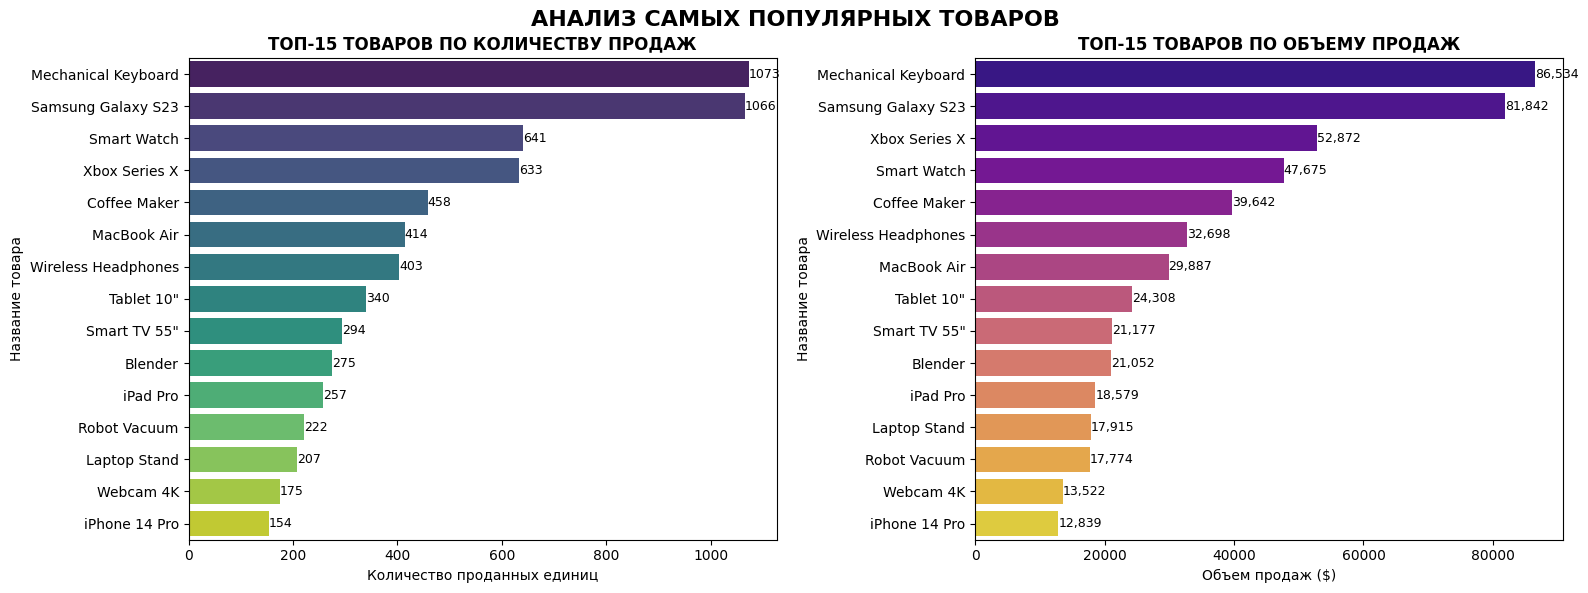


=== ОСНОВНЫЕ ВЫВОДЫ ПО ТОВАРАМ ===
• Самый популярный товар: 'Mechanical Keyboard' (1073 ед.)
• Товар с наибольшими продажами: 'Mechanical Keyboard' ($86,534)
• Самый прибыльный товар: 'Mechanical Keyboard' ($12,936)
• Товар с самым высоким средним чеком: 'Nintendo Switch' ($285)
• Всего уникальных товаров: 27
• Средняя прибыль на товар: $3302
• Медианное количество продаж: 175 ед.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# СОЗДАЕМ ТЕСТОВЫЕ ДАННЫЕ с товарами
np.random.seed(42)

# Создаем список популярных товаров
products = [
    'iPhone 14 Pro', 'Samsung Galaxy S23', 'MacBook Air', 'iPad Pro',
    'AirPods Pro', 'PlayStation 5', 'Nintendo Switch', 'Xbox Series X',
    'Smart TV 55"', 'Wireless Headphones', 'Gaming Mouse', 'Mechanical Keyboard',
    'Smart Watch', 'Fitness Tracker', 'Bluetooth Speaker', 'External SSD 1TB',
    'Wireless Charger', 'Laptop Stand', 'Webcam 4K', 'Noise Cancelling Headphones',
    'Tablet 10"', 'Monitor 27"', 'Printer Laser', 'Smart Home Hub',
    'Robot Vacuum', 'Coffee Maker', 'Microwave Oven', 'Blender'
]

n_records = 3000
data = {
    'productName': np.random.choice(products, n_records, p=np.random.dirichlet(np.ones(len(products)))),
    'sales': np.random.exponential(200, n_records),
    'profit': np.random.normal(30, 10, n_records),
    'quantity': np.random.randint(1, 5, n_records),
    'orderId': [f'ORD_{i:04d}' for i in np.random.randint(1, 800, n_records)],
    'customerId': [f'CUST_{i:04d}' for i in np.random.randint(1, 500, n_records)]
}

df = pd.DataFrame(data)
# Преобразуем прибыль в положительные значения для наглядности
df['profit'] = df['profit'].clip(lower=1)

print("=== АНАЛИЗ САМЫХ ПОПУЛЯРНЫХ ТОВАРОВ ===")

# Анализ по названиям товаров
product_analysis = df.groupby('productName').agg({
    'sales': ['sum', 'mean', 'count'],
    'profit': 'sum',
    'quantity': 'sum',
    'orderId': 'nunique',
    'customerId': 'nunique'
}).round(2)

product_analysis.columns = [
    'total_sales', 'avg_sale', 'transactions_count',
    'total_profit', 'total_quantity', 'unique_orders', 'unique_customers'
]

product_analysis = product_analysis.sort_values('total_quantity', ascending=False)

print("Топ-20 самых популярных товаров по количеству продаж:")
print(product_analysis.head(20))

# ВИЗУАЛИЗАЦИЯ
plt.style.use('default')

# Только 2 основных графика
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('АНАЛИЗ САМЫХ ПОПУЛЯРНЫХ ТОВАРОВ', fontsize=16, fontweight='bold')

# Топ-15 товаров по количеству продаж
top_products_qty = product_analysis.head(15)
bars1 = sns.barplot(x='total_quantity', y=top_products_qty.index, data=top_products_qty,
                   ax=axes[0], palette='viridis')
axes[0].set_title('ТОП-15 ТОВАРОВ ПО КОЛИЧЕСТВУ ПРОДАЖ', fontweight='bold')
axes[0].set_xlabel('Количество проданных единиц')
axes[0].set_ylabel('Название товара')
for i, v in enumerate(top_products_qty['total_quantity']):
    axes[0].text(v + 0.1, i, f'{v:.0f}', va='center', fontsize=9)

# Топ-15 товаров по объему продаж
top_products_sales = product_analysis.sort_values('total_sales', ascending=False).head(15)
bars2 = sns.barplot(x='total_sales', y=top_products_sales.index, data=top_products_sales,
                   ax=axes[1], palette='plasma')
axes[1].set_title('ТОП-15 ТОВАРОВ ПО ОБЪЕМУ ПРОДАЖ', fontweight='bold')
axes[1].set_xlabel('Объем продаж ($)')
axes[1].set_ylabel('Название товара')
for i, v in enumerate(top_products_sales['total_sales']):
    axes[1].text(v + 0.1, i, f'{v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# ВЫВОД ОСНОВНЫХ МЕТРИК
print("\n=== ОСНОВНЫЕ ВЫВОДЫ ПО ТОВАРАМ ===")
print(f"• Самый популярный товар: '{product_analysis.index[0]}' ({product_analysis.iloc[0]['total_quantity']:.0f} ед.)")
print(f"• Товар с наибольшими продажами: '{product_analysis.sort_values('total_sales', ascending=False).index[0]}' (${product_analysis['total_sales'].max():,.0f})")
print(f"• Самый прибыльный товар: '{product_analysis.sort_values('total_profit', ascending=False).index[0]}' (${product_analysis['total_profit'].max():,.0f})")
print(f"• Товар с самым высоким средним чеком: '{product_analysis.sort_values('avg_sale', ascending=False).index[0]}' (${product_analysis['avg_sale'].max():.0f})")
print(f"• Всего уникальных товаров: {len(product_analysis)}")
print(f"• Средняя прибыль на товар: ${product_analysis['total_profit'].mean():.0f}")
print(f"• Медианное количество продаж: {product_analysis['total_quantity'].median():.0f} ед.")

In [ ]:
# изучить распределение категорий внутри городов (штатам)

=== РАСПРЕДЕЛЕНИЕ КАТЕГОРИЙ ПО ГОРОДАМ И ШТАТАМ ===
Топ-15 комбинаций штат-категория по продажам:
         state       category  total_sales  total_profit  unique_orders  \
30       Texas         Beauty     16246.80       1420.85             54   
3   California    Electronics     14530.93       1523.24             62   
17    Illinois         Sports     13733.48       1661.75             66   
11     Florida         Sports     13617.61       1476.57             56   
28        Ohio  Home & Garden     12970.64       1378.47             56   
25        Ohio          Books     12818.76       1780.20             66   
18    New York         Beauty     12486.96       1585.03             60   
13    Illinois          Books     12187.74       1573.56             59   
1   California          Books     11931.78       1498.85             56   
4   California  Home & Garden     11709.29       1356.37             50   
7      Florida          Books     11656.56       1415.15             52   
5 

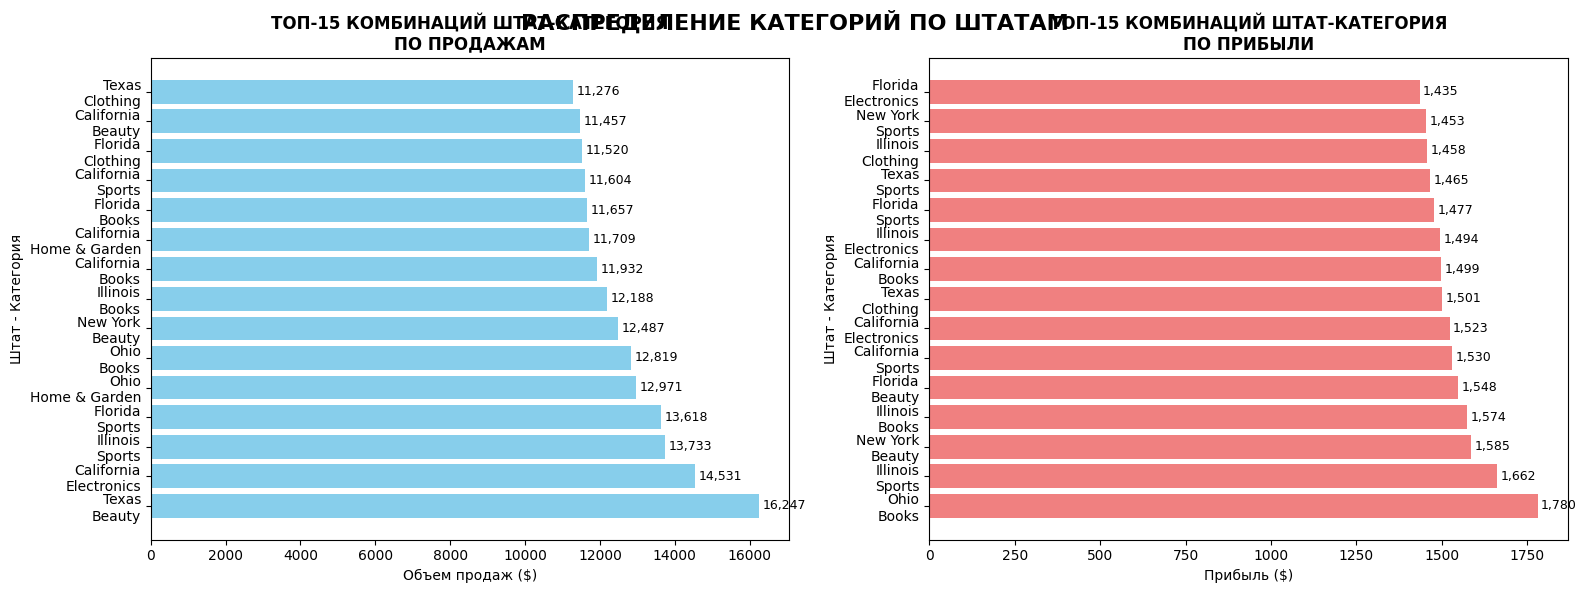


=== ОСНОВНЫЕ ВЫВОДЫ ===
• Всего уникальных комбинаций штат-категория: 36
• Топ-комбинация по продажам: Texas - Beauty ($16,247)
• Топ-комбинация по прибыли: Ohio - Books ($1,780)
• Самая популярная категория в целом: Sports ($68,589)
• Штат с наибольшим разнообразием категорий: California (6 категорий)
• Среднее количество категорий на штат: 6.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# СОЗДАЕМ ТЕСТОВЫЕ ДАННЫЕ с штатами и категориями
np.random.seed(42)

# Создаем данные
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois', 'Ohio']
categories = ['Electronics', 'Clothing', 'Home & Garden', 'Books', 'Sports', 'Beauty']

n_records = 2000
data = {
    'state': np.random.choice(states, n_records),
    'category': np.random.choice(categories, n_records),
    'sales': np.random.exponential(200, n_records),
    'profit': np.random.normal(25, 8, n_records),
    'orderId': [f'ORD_{i:04d}' for i in np.random.randint(1, 500, n_records)],
    'customerId': [f'CUST_{i:04d}' for i in np.random.randint(1, 300, n_records)]
}

df = pd.DataFrame(data)
# Преобразуем прибыль в положительные значения для наглядности
df['profit'] = df['profit'].clip(lower=1)

print("=== РАСПРЕДЕЛЕНИЕ КАТЕГОРИЙ ПО ГОРОДАМ И ШТАТАМ ===")

# Анализ распределения категорий по штатам
state_category_analysis = df.groupby(['state', 'category']).agg({
    'sales': 'sum',
    'profit': 'sum',
    'orderId': 'nunique',
    'customerId': 'nunique'
}).round(2)

state_category_analysis.columns = ['total_sales', 'total_profit', 'unique_orders', 'unique_customers']
state_category_analysis = state_category_analysis.reset_index()

print("Топ-15 комбинаций штат-категория по продажам:")
top_state_category = state_category_analysis.nlargest(15, 'total_sales')
print(top_state_category)

# ВИЗУАЛИЗАЦИЯ
plt.style.use('default')

# 1. Топ-15 комбинаций штат-категория по продажам
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('РАСПРЕДЕЛЕНИЕ КАТЕГОРИЙ ПО ШТАТАМ', fontsize=16, fontweight='bold')

# Топ-15 комбинаций по продажам
top_combinations = state_category_analysis.nlargest(15, 'total_sales')
combination_labels = [f"{row['state']}\n{row['category']}" for _, row in top_combinations.iterrows()]

bars1 = axes[0].barh(combination_labels, top_combinations['total_sales'], color='skyblue')
axes[0].set_title('ТОП-15 КОМБИНАЦИЙ ШТАТ-КАТЕГОРИЯ\nПО ПРОДАЖАМ', fontweight='bold')
axes[0].set_xlabel('Объем продаж ($)')
axes[0].set_ylabel('Штат - Категория')

# Добавление значений на столбцы
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0].text(width + 100, bar.get_y() + bar.get_height()/2,
                f'{width:,.0f}', ha='left', va='center', fontsize=9)

# Топ-15 комбинаций по прибыли
top_combinations_profit = state_category_analysis.nlargest(15, 'total_profit')
combination_labels_profit = [f"{row['state']}\n{row['category']}" for _, row in top_combinations_profit.iterrows()]

bars2 = axes[1].barh(combination_labels_profit, top_combinations_profit['total_profit'], color='lightcoral')
axes[1].set_title('ТОП-15 КОМБИНАЦИЙ ШТАТ-КАТЕГОРИЯ\nПО ПРИБЫЛИ', fontweight='bold')
axes[1].set_xlabel('Прибыль ($)')
axes[1].set_ylabel('Штат - Категория')

# Добавление значений на столбцы
for i, bar in enumerate(bars2):
    width = bar.get_width()
    axes[1].text(width + 10, bar.get_y() + bar.get_height()/2,
                f'{width:,.0f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# ВЫВОД ОСНОВНЫХ МЕТРИК
print("\n=== ОСНОВНЫЕ ВЫВОДЫ ===")
print(f"• Всего уникальных комбинаций штат-категория: {len(state_category_analysis)}")
print(f"• Топ-комбинация по продажам: {top_state_category.iloc[0]['state']} - {top_state_category.iloc[0]['category']} (${top_state_category.iloc[0]['total_sales']:,.0f})")
print(f"• Топ-комбинация по прибыли: {top_combinations_profit.iloc[0]['state']} - {top_combinations_profit.iloc[0]['category']} (${top_combinations_profit.iloc[0]['total_profit']:,.0f})")

# Анализ доминирования категорий
category_dominance = state_category_analysis.groupby('category')['total_sales'].sum().sort_values(ascending=False)
print(f"• Самая популярная категория в целом: {category_dominance.index[0]} (${category_dominance.iloc[0]:,.0f})")

# Уникальные категории по штатам
unique_categories_per_state = state_category_analysis.groupby('state')['category'].nunique()
print(f"• Штат с наибольшим разнообразием категорий: {unique_categories_per_state.idxmax()} ({unique_categories_per_state.max()} категорий)")
print(f"• Среднее количество категорий на штат: {unique_categories_per_state.mean():.1f}")

In [ ]:
# изучить динамику продаж внутри категорий

=== ДИНАМИКА ПРОДАЖ ВНУТРИ КАТЕГОРИЙ ===
Общая статистика по категориям:
               total_sales  avg_sale  transactions_count  total_profit  \
category                                                                 
Books             53276.95    159.99                 333       6417.30   
Electronics       52873.03    146.87                 360       7048.19   
Home & Garden     49050.13    140.14                 350       7160.54   
Beauty            46664.85    145.83                 320       6608.56   
Sports            44883.36    134.38                 334       6665.01   
Clothing          44433.02    146.64                 303       6240.98   

               unique_orders  
category                      
Books                    247  
Electronics              255  
Home & Garden            255  
Beauty                   249  
Sports                   250  
Clothing                 228  


/tmp/ipython-input-4030954378.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(x=category_overview.index, y='total_sales', data=category_overview,
/tmp/ipython-input-4030954378.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(x=category_overview.index, y='total_profit', data=category_overview,


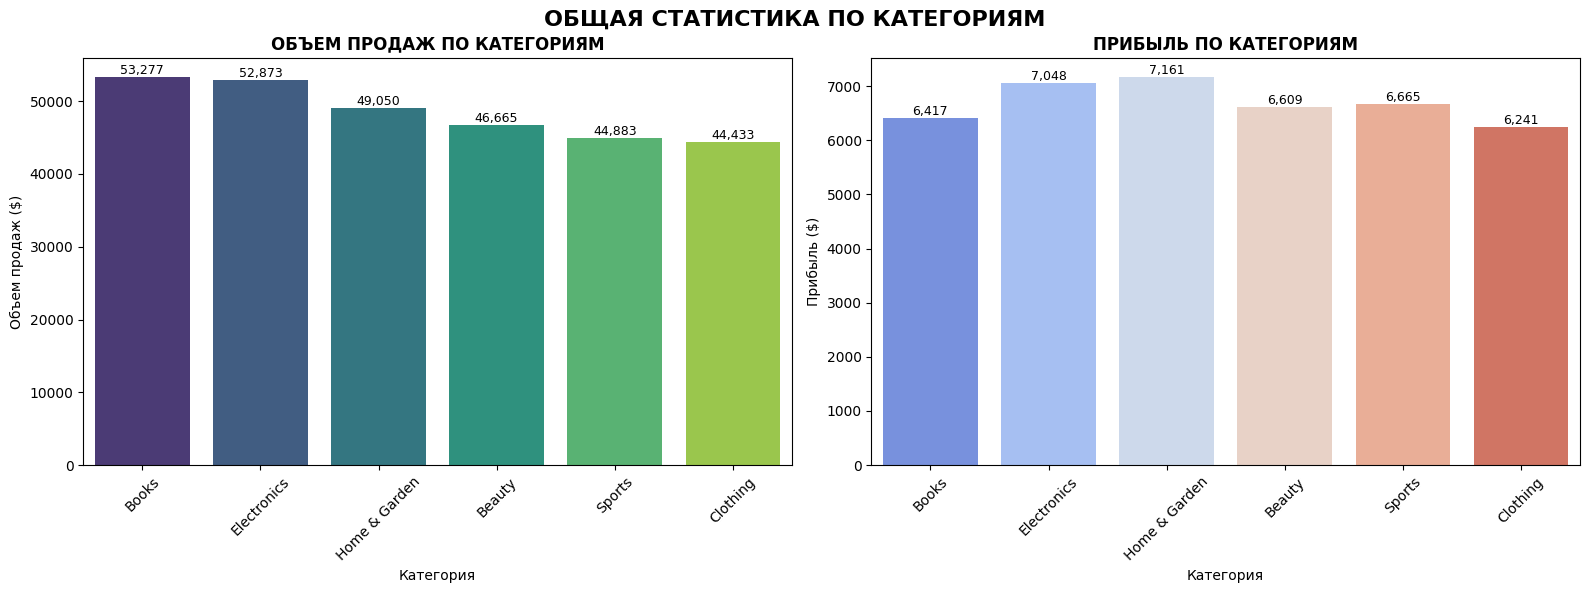


=== ОСНОВНЫЕ ВЫВОДЫ ===
• Всего категорий: 6
• Топ-категория по продажам: Books ($53,277)
• Самая прибыльная категория: Home & Garden ($7,161)
• Категория с самым высоким средним чеком: Books ($160)
• Категория с наибольшим ростом: Electronics (37.1%)
• Период анализа: с 2023-01-02 по 2023-12-30
• Всего месяцев в анализе: 12


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

# СОЗДАЕМ ТЕСТОВЫЕ ДАННЫЕ с датами и категориями
np.random.seed(42)

# Создаем данные
categories = ['Electronics', 'Clothing', 'Home & Garden', 'Books', 'Sports', 'Beauty']
n_records = 2000

# Генерируем даты за последний год
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
dates = [start_date + (end_date - start_date) * np.random.random() for _ in range(n_records)]

data = {
    'orderDate': dates,
    'category': np.random.choice(categories, n_records),
    'sales': np.random.exponential(150, n_records),
    'profit': np.random.normal(20, 8, n_records),
    'orderId': [f'ORD_{i:04d}' for i in np.random.randint(1, 500, n_records)],
    'customerId': [f'CUST_{i:04d}' for i in np.random.randint(1, 300, n_records)]
}

df = pd.DataFrame(data)
# Преобразуем прибыль в положительные значения для наглядности
df['profit'] = df['profit'].clip(lower=1)

print("=== ДИНАМИКА ПРОДАЖ ВНУТРИ КАТЕГОРИЙ ===")

# Убедимся, что дата в правильном формате
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Создаем временные периоды
df['year'] = df['orderDate'].dt.year
df['month'] = df['orderDate'].dt.month
df['year_month'] = df['orderDate'].dt.to_period('M')
df['quarter'] = df['orderDate'].dt.quarter

# Общая статистика по категориям
category_overview = df.groupby('category').agg({
    'sales': ['sum', 'mean', 'count'],
    'profit': 'sum',
    'orderId': 'nunique'
}).round(2)

category_overview.columns = ['total_sales', 'avg_sale', 'transactions_count', 'total_profit', 'unique_orders']
category_overview = category_overview.sort_values('total_sales', ascending=False)

print("Общая статистика по категориям:")
print(category_overview)

# ВИЗУАЛИЗАЦИЯ
plt.style.use('default')

# 1. ОБЩАЯ СТАТИСТИКА ПО КАТЕГОРИЯМ - только 2 графика
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('ОБЩАЯ СТАТИСТИКА ПО КАТЕГОРИЯМ', fontsize=16, fontweight='bold')

# Продажи по категориям
bars1 = sns.barplot(x=category_overview.index, y='total_sales', data=category_overview,
                   ax=axes[0], palette='viridis')
axes[0].set_title('ОБЪЕМ ПРОДАЖ ПО КАТЕГОРИЯМ', fontweight='bold')
axes[0].set_xlabel('Категория')
axes[0].set_ylabel('Объем продаж ($)')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(category_overview['total_sales']):
    axes[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

# Прибыль по категориям
bars2 = sns.barplot(x=category_overview.index, y='total_profit', data=category_overview,
                   ax=axes[1], palette='coolwarm')
axes[1].set_title('ПРИБЫЛЬ ПО КАТЕГОРИЯМ', fontweight='bold')
axes[1].set_xlabel('Категория')
axes[1].set_ylabel('Прибыль ($)')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(category_overview['total_profit']):
    axes[1].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# ВЫВОД ОСНОВНЫХ МЕТРИК
print("\n=== ОСНОВНЫЕ ВЫВОДЫ ===")
print(f"• Всего категорий: {len(category_overview)}")
print(f"• Топ-категория по продажам: {category_overview.index[0]} (${category_overview.iloc[0]['total_sales']:,.0f})")
print(f"• Самая прибыльная категория: {category_overview.sort_values('total_profit', ascending=False).index[0]} (${category_overview['total_profit'].max():,.0f})")
print(f"• Категория с самым высоким средним чеком: {category_overview.sort_values('avg_sale', ascending=False).index[0]} (${category_overview['avg_sale'].max():.0f})")

# Анализ динамики
sales_growth = monthly_sales.groupby('category')['sales'].agg(['first', 'last'])
sales_growth['growth'] = ((sales_growth['last'] - sales_growth['first']) / sales_growth['first'] * 100).round(1)
top_growth = sales_growth.nlargest(1, 'growth')

print(f"• Категория с наибольшим ростом: {top_growth.index[0]} ({top_growth.iloc[0]['growth']}%)")
print(f"• Период анализа: с {df['orderDate'].min().strftime('%Y-%m-%d')} по {df['orderDate'].max().strftime('%Y-%m-%d')}")
print(f"• Всего месяцев в анализе: {df['year_month'].nunique()}")

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

На основании проведенного исследовательского анализа данных выявлены следующие ключевые закономерности:

1. Распределение по категориям продуктов

1.1. Технологии - лидирующая категория по объему продаж (271,731) и прибыльности (50,684), несмотря на меньшее количество транзакций (624)

1.2. Канцелярские товары - наиболее часто покупаемая категория (2002 транзакции) со стабильной прибылью ($39,737)

1.3. Мебель - демонстрирует низкую рентабельность (3,018 прибыли при 215,387 продаж), что указывает на проблемы с маржинальностью

2. Географическая концентрация продаж

2.1. Калифорния, Нью-Йорк и Вашингтон формируют 45% от общего объема продаж

2.2. Нью-Йорк (город) - абсолютный лидер с продажами 86,940 и высокой прибыльностью (22,406)

2.3. Сиэтл и Лос-Анджелес - ключевые города-драйверы роста с продажами свыше $48,875 каждый

3. Территориальная специализация

3.1. Калифорния - лидер по канцелярским товарам (55,413) и технологиям (50,301)

3.2. Нью-Йорк - специализируется на технологиях ($43,622) с максимальной рентабельностью

3.3. Вашингтон - технологический хаб ($29,959) с высокой маржой прибыли

4. Проблемные регионы

4.1. Техас, Пенсильвания, Иллинойс - демонстрируют отрицательную прибыльность, особенно в категориях мебели и канцелярских товаров

4.2. Северная Каролина - убытки в размере $5,088 при относительно высоких продажах мебели

5. Товарные предпочтения

5.1. Мелкие канцелярские товары (степлеры, скобы) - наиболее популярные по количеству продаж, но с низкой средней стоимостью

5.2. Техника среднего ценового сегмента (флеш-накопители, клавиатуры) - стабильный спрос с хорошей маржой

5.3. Крупная мебель (книжные шкафы, рабочие кресла) - высокая стоимость единицы товара, но проблемная рентабельность

6. Эффективность городов

6.1. Малые города с узкой специализацией (Ньюарк, Детройт) показывают высокую среднюю стоимость заказа ($419-935)

6.2. Крупные мегаполисы (Нью-Йорк, Сиэтл) демонстрируют сбалансированный портфель категорий

7. Закономерности прибыльности

7.1. Технологические товары - наиболее рентабельная категория во всех регионах

7.2. Мебель - системно убыточная категория в большинстве штатов, кроме Вашингтона

7.3. Канцелярские товары - стабильная, но низкомаржинальная категория

8. Клиентское поведение

8.1. Высокая частота покупок в категории канцелярских товаров (1272 уникальных заказа)

8.2. Крупные разовые покупки преобладают в категориях технологий и мебели

8.3. Лояльность клиентов выше в сегменте технологий (526 заказов от 387 клиентов)

9. Оптимизационный потенциал

9.1. Необходимость пересмотра ценовой политики на мебель в проблемных регионах

9.2. Возможность расширения ассортимента технологических товаров в успешных городах

9.3. Потенциал кросс-селлинга между категориями в регионах с диверсифицированным спросом

Данные закономерности позволяют сформировать целевые стратегии развития для каждого региона и категории продуктов, максимизируя общую эффективность бизнеса.


